Nama  : Fahmi Adhiwangsa
NIM   : 1103204142

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [3]:
dataset = "/content/penguins.csv"
df = pd.read_csv(dataset)
df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


In [4]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [5]:
df = df.rename(columns={"sex" : "Gender",
                        "culmen_length_mm" : "Culmen Length (mm)",
                        "culmen_depth_mm" : "Culmen Depth (mm)",
                        "flipper_length_mm" : "Flipper Length (mm)",
                        "body_mass_g" : "Body Mass (g)"
})


In [6]:
df.head(10)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Gender
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


In [8]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
def drop_outliers(data, columns):
    for item in columns:
        q1 = data[item].quantile(0.25)
        q3 = data[item].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        upper_array = np.where(data[item]>=upper)[0]
        lower_array = np.where(data[item]<=lower)[0]

        data.drop(index=upper_array, inplace=True)
        data.drop(index=lower_array, inplace=True)
    return data

In [12]:
numerical_df = ["Body Mass (g)", "Flipper Length (mm)", "Culmen Depth (mm)", "Culmen Length (mm)"]
df = drop_outliers(df, numerical_df)

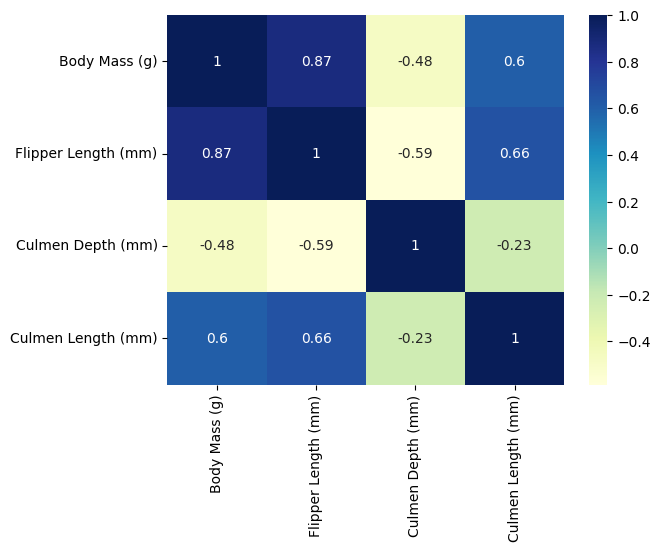

In [14]:
sns.heatmap(df[numerical_df].corr(), cmap="YlGnBu", annot=True);

In [17]:
numerical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder())
])

col_transformer = ColumnTransformer([
    ("numericals", numerical_pipeline, numerical_df),
    ("categorical", categorical_pipeline, ["Gender"])
])

full_pipeline = Pipeline([
    ("transformers", col_transformer),
    ("PCA", PCA(n_components=2))
])

In [18]:
df_prepared = full_pipeline.fit_transform(df)

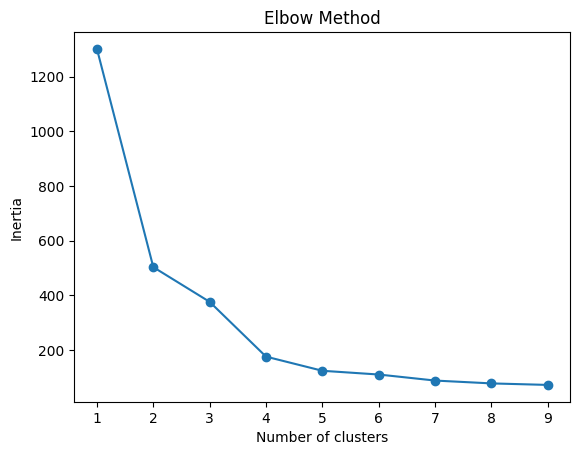

In [20]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(df_prepared)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

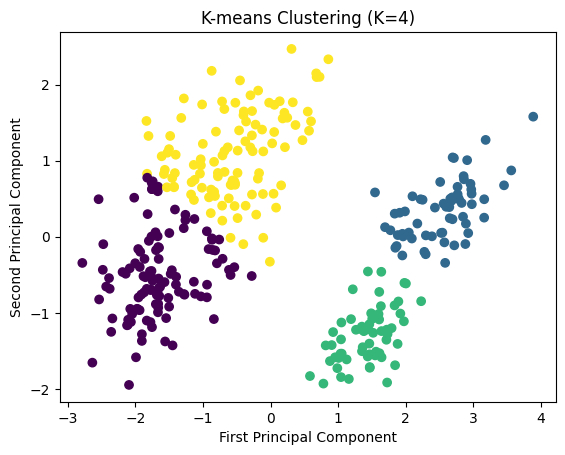

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto").fit(df_prepared)
plt.scatter(df_prepared[:, 0], df_prepared[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("K-means Clustering (K=4)")
plt.show()

In [24]:
silhouette_avg = silhouette_score(df_prepared, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

calinski_harabasz_avg = calinski_harabasz_score(df_prepared, kmeans.labels_)
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")


Silhouette Score: 0.5384949847229846
Calinski-Harabasz Score: 717.9432528812797
